Mounted at /content/gdrive
Start of file: 'Gammaproteobacteria,0.04415611593596317,0.09294976'
End of file: '\nGadus,0.0,0.0,0.0,0.0,0.00027104678267468965,0.0\n'
{'Anaerolinea': [111.77777777777779, 161.0, 123.42774566473989, 121.62244897959184, 292.8095238095238, 185.37894736842105], 'Bacteroides': [50.3, 65.55, 70.70529801324504, 62.40314136125654, 106.01724137931033, 61.362369337979096], 'Clostridium': [97.52040816326532, 189.2164948453608, 152.52142857142857, 126.79787234042551, 230.5875, 174.36633663366337], 'Syntrophus': [248.2337662337662, 399.0, 309.463768115942, 253.59574468085103, 1085.1176470588234, 382.8478260869565], 'Maribacter': [122.13418530351437, 83.42727272727272, 87.15510204081632, 102.75, 75.60245901639345, 68.79296875], 'Mycobacterium': [455.09523809523813, 359.8823529411765, 292.5068493150685, 229.21153846153848, 256.2083333333333, 279.53968253968253], 'Pseudomonas': [135.56028368794327, 93.64285714285714, 90.86382978723405, 122.8762886597938, 84.61926605504587,

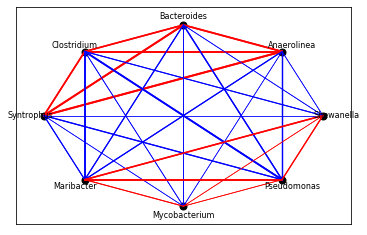

['Anaerolinea', 'Bacteroides', 'Clostridium', 'Syntrophus', 'Maribacter', 'Mycobacterium', 'Pseudomonas', 'Shewanella']


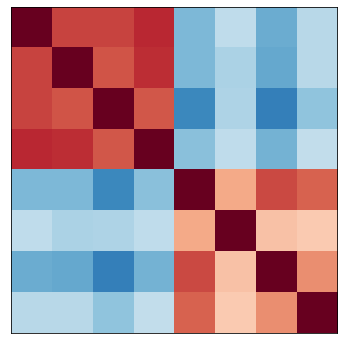

In [1]:
# Covariance = SUM((x - xmean) * (y - ymean)) / (N - 1) 
import numpy as np
import math
from scipy import linalg
from sklearn.covariance import GraphicalLassoCV, ledoit_wolf, empirical_covariance
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from google.colab import drive
drive.mount('/content/gdrive')
# #############################################################################
infile = "/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Frqs.All.MGs.Joined.csv"
with open(infile, 'r') as f:
  data = f.read() 
  print('Start of file:',repr(data[:50]))
  print('End of file:', repr(data[-50:]))
f.close()
lines = data.split('\n')
lines.pop()

SearchTaxa = [ 'Anaerolinea','Bacteroides', 'Clostridium', 'Syntrophus','Maribacter', 'Mycobacterium', 'Pseudomonas', 'Shewanella']
         
"""
 'Anaerolinea','Bacteroides', 'Clostridium', 'Syntrophus','Maribacter', 'Mycobacterium', 'Pseudomonas', 'Shewanella'
 ['Desulfobacterium', 'Desulfatibacillum', 'Desulfococcus', 'Desulfovibrio',  'Desulfuromonas', 
'Nitrosococcus','Nitrosopumilus', 'Nitrosomonas', 'Nitrococcus', 'Nitrospira']

'Desulfobacterium', 'Desulfatibacillum', 'Desulfococcus', 'Desulfovibrio',  'Desulfuromonas', 
'Nitrosococcus','Nitrosopumilus', 'Nitrosomonas', 'Nitrococcus', 'Nitrospira'
"""
n_samples = 50
n_features = len(lines[0]) -1

table, genera = [], []
for x in range(len(SearchTaxa)):
  for y in range(len(lines)):
    row = lines[y].split(',')
    if row[0] == SearchTaxa[x]:
      #print(row[0])
      genera.append(row[0])
      for y in range(1, len(row)):
        row[y] = 1/float(row[y]) 
      table.append(row[1:])

frame ={}
for x in range(len(table)):
  frame[ genera[x] ] = table[x]  
print(frame)

df = pd.DataFrame(frame)
print()
#print('df', df)
covMatrix = pd.DataFrame.cov(df)
#print ('covMatrix:\n', covMatrix)

#plt.matshow(covMatrix, cmap='Reds')  #RdBu_r, spring, autumn, Reds, plasma, RdPu, Purples, jet
#plt.show()

cov = linalg.inv(covMatrix)
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
covMatrix *= d
covMatrix *= d[:, np.newaxis]
X = df  
X -= X.mean(axis=0)
X /= X.std(axis=0)

# #############################################################################
# Estimate the covariance
emp_cov = np.dot(X.T, X) / n_samples
model =  GraphicalLassoCV()   
model.fit(X)
covGL = model.covariance_
lw_prec_ = linalg.inv(covGL)

# #############################################################################
# define the plot parameters
w = 1
z = ''
def circular_plot1(x,y,z):
  plt.plot(m,n,'kx', marker ='o', markersize= '7')#,fillstyle='none')
  labels = [coords[i-1][0][:] for i in range(1,len(genera)+1)]  #'{0}'.format(i) +' '+  FOR PUTTING  NUMBERS IN FRONT OF TAXON NAMES
  for label in range(len(genera)):
    plt.annotate(labels[label], xy = (p[label], q[label]), xytext = (0, 0), textcoords = 'offset points', va='center', ha='center', fontsize=8)   
  plt.xlim(-1.2,1.2)
  plt.ylim(-1.2,1.2)

# Plot the results
m, n, p, q, r, s, kx, ky =[], [], [], [], [], [], [], []
coords =[]
for w in range(0, len(genera)):
   x = (math.cos(2 * math.pi * (w +1) / (len(genera))))
   y = (math.sin(2 * math.pi * (w +1) / (len(genera))))
   e = x * 1.5
   f = y * 1.5
   m.append(x)
   n.append(y)
   p.append(x * 1.1)
   q.append(y * 1.1)
   coords.append([genera[w][:], [m[w], n[w]]])
circular_plot1(m,n,'k+')
plt.xticks(())
plt.yticks(())

lw =3
for a1 in range(len(genera)):
  for b1 in range(len(genera)):
    if covGL[a1][b1] >0:
      plt.plot([coords[a1][1][0], coords[b1][1][0]] , [coords[a1][1][1], coords[b1][1][1]], color = 'r', linewidth= covGL[a1][b1] * lw)
    else: 
      plt.plot([coords[a1][1][0], coords[b1][1][0]] , [coords[a1][1][1], coords[b1][1][1]], color = 'b', linewidth= covGL[a1][b1] * lw)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the covariances
#print('Graphical Lasso Covariance:\n', covGL)
print(genera)       
vmax = covGL.max()
plt.imshow(covGL, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
#plt.title('Graphical Lasso CV')
plt.show()
